In [17]:
pip install pandas numpy scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('ethereum_historical_data.csv')

# Create feature columns
data['30_day_avg'] = data['price'].rolling(window=30).mean().shift(1)
data['10_day_avg'] = data['price'].rolling(window=10).mean().shift(1)
data['daily_return'] = data['price'].pct_change().shift(1)

# Drop NA values
data.dropna(inplace=True)

# Define features and target variable
X = data[['30_day_avg', '10_day_avg', 'daily_return']]
y = data['price']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

# Neural Network Model (Multi-Layer Perceptron)
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Function to get prediction intervals
def get_prediction_intervals(model, X, percentile=95):
    # Get prediction from each tree
    preds = np.stack([tree.predict(X) for tree in model.estimators_])
    # Calculate lower and upper percentiles
    lower = np.percentile(preds, (100 - percentile) / 2, axis=0)
    upper = np.percentile(preds, 100 - (100 - percentile) / 2, axis=0)
    return lower, upper

# Get prediction intervals for Random Forest predictions
rf_lower, rf_upper = get_prediction_intervals(rf_model, X_test)

# Print RMSE and Prediction Intervals
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest Prediction Intervals: Lower - {rf_lower}, Upper - {rf_upper}")


Random Forest RMSE: 117.89
Random Forest Prediction Intervals: Lower - [2080.91024366  225.84477922 1186.77792104  127.04525801 2120.03737451
 1320.15034551  351.33156702 1794.97342519 3524.92627504 1188.72866388
  590.06201081  337.84505194  200.69072858 1165.97377728 1782.5066763
 2930.74270607  150.39116277  165.66966005 1241.99709273 1335.85255239
  198.81964229 2518.49284527  187.27201837 1430.57120975 1828.89265461
  223.10340354  196.40374924  118.09297503 1875.35769447 1335.85255239
 2080.91024366  132.72274321 1794.97342519  140.24681084 1071.42276471
  221.0260853  1054.18861034 1438.74705033 4153.33331072   91.10115846
 2327.44632352  198.81964229  195.75140452 1468.86010373 1858.31119581
  239.50247914 1474.4032444   121.77010729 1530.03861743 1438.74705033
  125.61458431 2995.71942102 1051.07406816  104.62362623  114.76604585
  168.73181978  169.42286695 1275.69377739 1874.20024968  131.45872466
 1563.22566201 1217.70208922 1874.20024968  147.14578647 1416.66155284
 1217.7

/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  

In [19]:
from joblib import dump

# Save the models to disk
dump(tree_model, 'decision_tree_model.joblib')
dump(linear_model, 'linear_regression_model.joblib')
dump(nn_model, 'neural_network_model.joblib')
dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

RECURSIVE APPROACH FOR PREDICTION

In [20]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load the historical data
data = pd.read_csv('ethereum_historical_data.csv')

# Generate the necessary features
data['10_day_avg'] = data['price'].rolling(window=10).mean()
data['30_day_avg'] = data['price'].rolling(window=30).mean()
data['daily_return'] = data['price'].pct_change()
data = data.dropna()

# Splitting the dataset into training and testing
X = data[['10_day_avg', '30_day_avg', 'daily_return']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
decision_tree_model = DecisionTreeRegressor().fit(X_train, y_train)
linear_regression_model = LinearRegression().fit(X_train, y_train)
neural_network_model = MLPRegressor(max_iter=2000).fit(X_train, y_train)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Function to get prediction intervals
def get_prediction_intervals(model, X, percentile=95):
    # Get prediction from each tree
    preds = np.stack([tree.predict(X) for tree in model.estimators_])
    # Calculate lower and upper percentiles
    lower = np.percentile(preds, (100 - percentile) / 2, axis=0)
    upper = np.percentile(preds, 100 - (100 - percentile) / 2, axis=0)
    return lower, upper

# Mock function to generate features for the next 10 days
def generate_features(data):
    # This is a mock function, replace with your actual function to generate future features
    return pd.DataFrame({
        '10_day_avg': [data['10_day_avg'].iloc[-1]] * 10,
        '30_day_avg': [data['30_day_avg'].iloc[-1]] * 10,
        'daily_return': [data['daily_return'].iloc[-1]] * 10
    })

# Generate features for the next 10 days
future_features = generate_features(data)

# Ensure feature order matches the order during training
feature_order = ['10_day_avg', '30_day_avg', 'daily_return']
future_features = future_features[feature_order]

# Predict with each model
decision_tree_predictions = decision_tree_model.predict(future_features)
linear_regression_predictions = linear_regression_model.predict(future_features)
neural_network_predictions = neural_network_model.predict(future_features)
random_forest_predictions = random_forest_model.predict(future_features)

# Get prediction intervals for Random Forest predictions
rf_lower, rf_upper = get_prediction_intervals(random_forest_model, future_features)

# Print the predictions
print("Decision Tree Predictions:", decision_tree_predictions)
print("Linear Regression Predictions:", linear_regression_predictions)
print("Neural Network Predictions:", neural_network_predictions)
print("Random Forest Predictions:", random_forest_predictions)
print("Random Forest Prediction Intervals: Lower -", rf_lower, ", Upper -", rf_upper)


Decision Tree Predictions: [1591.86583235 1591.86583235 1591.86583235 1591.86583235 1591.86583235
 1591.86583235 1591.86583235 1591.86583235 1591.86583235 1591.86583235]
Linear Regression Predictions: [1612.60790903 1612.60790903 1612.60790903 1612.60790903 1612.60790903
 1612.60790903 1612.60790903 1612.60790903 1612.60790903 1612.60790903]
Neural Network Predictions: [1605.49704584 1605.49704584 1605.49704584 1605.49704584 1605.49704584
 1605.49704584 1605.49704584 1605.49704584 1605.49704584 1605.49704584]
Random Forest Predictions: [1596.19972163 1596.19972163 1596.19972163 1596.19972163 1596.19972163
 1596.19972163 1596.19972163 1596.19972163 1596.19972163 1596.19972163]
Random Forest Prediction Intervals: Lower - [1565.72888305 1565.72888305 1565.72888305 1565.72888305 1565.72888305
 1565.72888305 1565.72888305 1565.72888305 1565.72888305 1565.72888305] , Upper - [1656.07438727 1656.07438727 1656.07438727 1656.07438727 1656.07438727
 1656.07438727 1656.07438727 1656.07438727 1656

/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/leandrohugo/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  

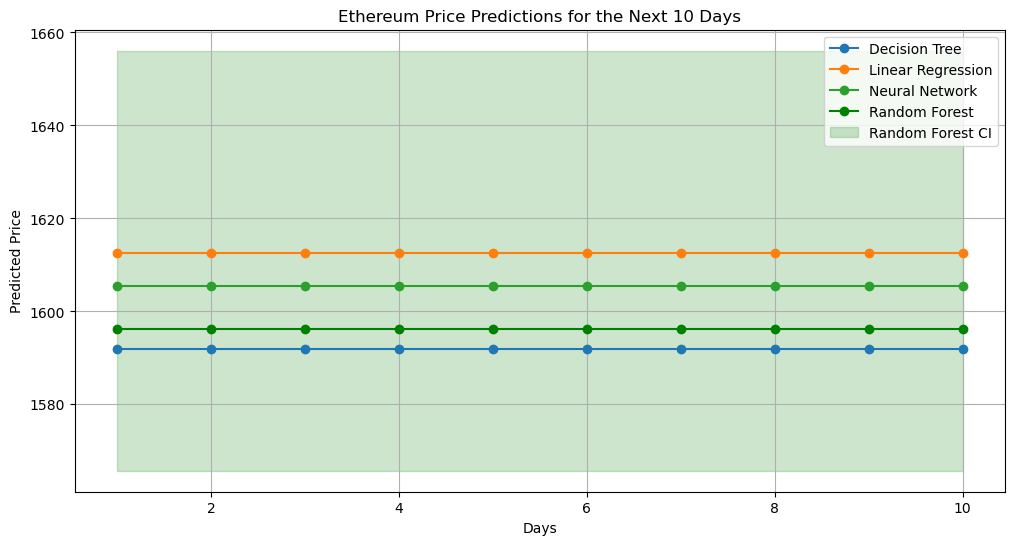

In [26]:
import matplotlib.pyplot as plt

days = np.arange(1, 11)  # Representing the next 10 days

plt.figure(figsize=(12, 6))

# Plotting the predictions
plt.plot(days, decision_tree_predictions, '-o', label="Decision Tree")
plt.plot(days, linear_regression_predictions, '-o', label="Linear Regression")
plt.plot(days, neural_network_predictions, '-o', label="Neural Network")

# Plotting Random Forest predictions with confidence intervals
plt.plot(days, random_forest_predictions, '-o', label="Random Forest", color="green")
plt.fill_between(days, rf_lower, rf_upper, color="green", alpha=0.2, label="Random Forest CI")  # Adding shaded area for Random Forest confidence intervals

# Adding title and labels
plt.title("Ethereum Price Predictions for the Next 10 Days")
plt.xlabel("Days")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)

plt.show()


The Random Forest predictions are plotted using the plt.plot function with a specified color (color="green").
The confidence intervals (upper and lower bounds) for the Random Forest predictions are visualized as a shaded area using the plt.fill_between function. The alpha=0.2 argument makes the shaded area slightly transparent.
A legend is added to label the different plots, including the confidence intervals (labeled as "Random Forest CI").

In [27]:
print(future_features.columns.tolist())


['10_day_avg', '30_day_avg', 'daily_return']


In [29]:
print(X_train.columns.tolist())


['10_day_avg', '30_day_avg', 'daily_return']
